In [ ]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
print("X_train dtype before:", X_train.dtype)
print("X_train shape:", X_train.shape)
print("Pixel range before normalization:", np.min(X_train), np.max(X_train))

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

print("X_train after normalization", X_train.dtype)

X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs = 5)


X_train dtype before: float32
X_train shape: (60000, 28, 28)
Pixel range before normalization: 0.0 1.0
X_train after normalization float32
Epoch 1/5
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 4:20 139ms/step - accuracy: 0.1250 - loss: 2.3021

/Users/aparimeyatiwari/Downloads/MACHINE_LEARNING_PROJECTS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - accuracy: 0.6081 - loss: 2.1877
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.7016 - loss: 1.9767
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - accuracy: 0.7403 - loss: 1.7905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.7601 - loss: 1.6268
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.7765 - loss: 1.4841


In [35]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.8001 - loss: 1.4041


[1.4040892124176025, 0.8001000285148621]

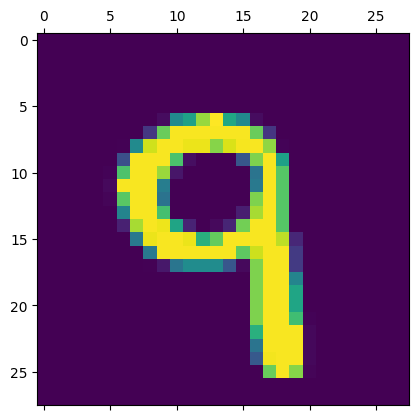

In [44]:
plt.matshow(X_test[599])


In [43]:
y_pred = model.predict(X_test_flat)
print(np.argmax(y_pred[599]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
9


In [46]:
y_pred_label = [np.argmax(i) for i in y_pred]
(y_pred_label)

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(4),
 np.int64(7),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(6),
 np.int64(4),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(1),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(9),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [48]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 928,    2,    7,   10,    0,    2,   25,    1,    5,    0],
       [   0, 1114,    8,    4,    0,    0,    4,    0,    5,    0],
       [  19,   93,  791,   30,   16,    0,   30,   22,   30,    1],
       [   6,   52,   27,  865,    1,    2,    5,   23,   21,    8],
       [   2,   53,    3,    0,  785,    0,   28,    9,    3,   99],
       [  38,  121,    5,  207,   33,  376,   26,   39,   20,   27],
       [  27,   50,    8,    0,   15,    9,  848,    0,    1,    0],
       [   2,   75,   14,    2,   10,    0,    2,  896,    6,   21],
       [  25,  106,   11,   99,   17,    6,   16,   25,  643,   26],
       [  23,   45,    5,   12,   72,    0,    1,   89,    7,  755]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

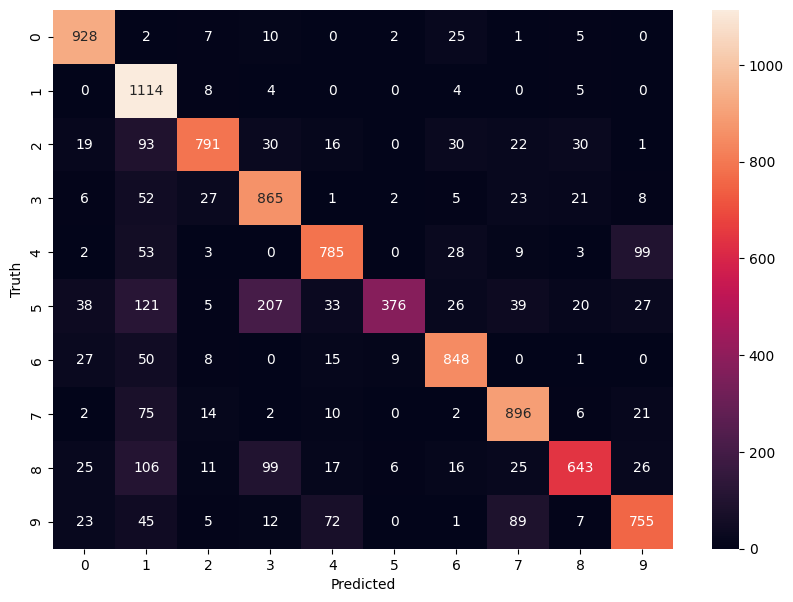

In [54]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512,input_shape = (784,),activation='relu'),
    keras.layers.Dense(256,input_shape = (784,),activation='relu'),
    keras.layers.Dense(128,input_shape = (784,),activation='relu'),
    keras.layers.Dense(64,input_shape = (784,),activation='relu'),
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8952 - loss: 0.5774
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9505 - loss: 0.1665
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9593 - loss: 0.1344
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9524 - loss: 0.1169
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9606 - loss: 0.0956
